In [3]:
from web3 import Web3

# Connect to Ethereum node
infura_url = 'https://sepolia.infura.io/v3/a77f7fa2b1684b61b8de38395308ae51'
w3 = Web3(Web3.HTTPProvider(infura_url))

# Check connection
if not w3.is_connected():
    raise Exception("Failed to connect to the Ethereum network")


In [4]:
import json
with open('defaultcollateralABI.json', 'r') as abi_file:
    contract_abi = json.load(abi_file)

In [5]:
import json
with open('wstETH_defaultcollateral.json', 'r') as abi_file:
    contract_abi_wstETH = json.load(abi_file)

In [6]:

# Default collateral contract address
contract_address = '0xC329400492c6ff2438472D4651Ad17389fCb843a'
# contract_abi = contract_abi
contract_abi = contract_abi_wstETH


# Initialize contract instance
contract = w3.eth.contract(address=contract_address, abi=contract_abi)
print(contract)

In [7]:
# Print contract details
print("Contract address:", contract.address)
print("Contract functions:", [func for func in contract.functions])
print("Contract events:", contract.events)
print("Contract all functions:", dir(contract.functions))
# contract_name = contract.functions.name().call()
# print(f"Token Name: {contract_name}")


Contract address: 0xC329400492c6ff2438472D4651Ad17389fCb843a
Contract functions: [<Function allowance(address,address)>, <Function approve(address,uint256)>, <Function asset()>, <Function balanceOf(address)>, <Function debt(address,address)>, <Function decimals()>, <Function deposit(address,uint256)>, <Function deposit(address,uint256,uint256,uint8,bytes32,bytes32)>, <Function increaseLimit(uint256)>, <Function initialize(address,uint256,address)>, <Function issueDebt(address,uint256)>, <Function issuerDebt(address)>, <Function issuerRepaidDebt(address)>, <Function limit()>, <Function limitIncreaser()>, <Function name()>, <Function recipientDebt(address)>, <Function recipientRepaidDebt(address)>, <Function repaidDebt(address,address)>, <Function setLimitIncreaser(address)>, <Function symbol()>, <Function totalDebt()>, <Function totalRepaidDebt()>, <Function totalSupply()>, <Function transfer(address,uint256)>, <Function transferFrom(address,address,uint256)>, <Function withdraw(address

In [8]:
import json
with open('ERC20-DAI.json', 'r') as abi_file:
    erc20_contract_abi = json.load(abi_file)

In [9]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
# User's account
user_address = config['Credentials']['Username']
private_key = config['Credentials']['PrivateKey']

# ERC-20 token details
erc20_address = '0x68194a729C2450ad26072b3D33ADaCbcef39D574'
erc20_abi = erc20_contract_abi
erc20_contract = w3.eth.contract(address=erc20_address, abi=erc20_abi)

In [10]:
# Print contract details
print("Contract address:", erc20_contract.address)
print("Contract functions:", [func for func in erc20_contract.functions])
print("Contract events:", erc20_contract.events)
print("Contract all functions:", dir(erc20_contract.functions))
token_name = erc20_contract.functions.name().call()
print(f"Token Name: {token_name}")

Contract address: 0x68194a729C2450ad26072b3D33ADaCbcef39D574
Contract functions: [<Function DOMAIN_SEPARATOR()>, <Function EIP712_REVISION()>, <Function PERMIT_TYPEHASH()>, <Function allowance(address,address)>, <Function approve(address,uint256)>, <Function balanceOf(address)>, <Function decimals()>, <Function decreaseAllowance(address,uint256)>, <Function increaseAllowance(address,uint256)>, <Function mint(uint256)>, <Function mint(address,uint256)>, <Function name()>, <Function nonces(address)>, <Function owner()>, <Function permit(address,address,uint256,uint256,uint8,bytes32,bytes32)>, <Function renounceOwnership()>, <Function symbol()>, <Function totalSupply()>, <Function transfer(address,uint256)>, <Function transferFrom(address,address,uint256)>, <Function transferOwnership(address)>]
Contract events: <web3.contract.contract.ContractEvents object at 0x0000021D22A41EE0>
Contract all functions: ['DOMAIN_SEPARATOR', 'EIP712_REVISION', 'PERMIT_TYPEHASH', '_DOMAIN_SEPARATOR()', '_EI

In [112]:

# Amount to deposit/withdraw (in wei)
amount = w3.to_wei(0.01, 'ether')

# Approve the DefaultCollateral contract to spend tokens
def approve_tokens():
    nonce = w3.eth.get_transaction_count(user_address)
    tx = erc20_contract.functions.approve(contract_address, amount).build_transaction({
        'chainId': 11155111, #for sepolia eth is 1
        'gas': 70000,
        'gasPrice': w3.to_wei('20', 'gwei'),
        'nonce': nonce,
    })
    signed_tx = w3.eth.account.sign_transaction(tx, private_key=private_key)
    tx_hash_approve = w3.eth.send_raw_transaction(signed_tx.raw_transaction)
    w3.eth.wait_for_transaction_receipt(tx_hash_approve)
    print(f"Approved {amount} tokens for {contract_address}")
    print(tx_hash_approve.hex())

# Deposit tokens into DefaultCollateral
def deposit_tokens():
    nonce = w3.eth.get_transaction_count(user_address)
    tx = contract.functions.deposit(user_address, amount).build_transaction({
        'chainId': 11155111,
        'gas': 100000,
        'gasPrice': w3.to_wei('20', 'gwei'),
        'nonce': nonce,
    })
    signed_tx = w3.eth.account.sign_transaction(tx, private_key=private_key)
    tx_hash_deposit = w3.eth.send_raw_transaction(signed_tx.raw_transaction)
    deposit_receipt = w3.eth.wait_for_transaction_receipt(tx_hash_deposit)
    print(f"Deposited {amount} tokens. Transaction hash: {tx_hash_deposit.hex()}")
    print(deposit_receipt)

# Withdraw tokens from DefaultCollateral
def withdraw_tokens():
    nonce = w3.eth.get_transaction_count(user_address)
    tx = contract.functions.withdraw(user_address, amount).build_transaction({
        'chainId': 11155111,
        'gas': 100000,
        'gasPrice': w3.to_wei('20', 'gwei'),
        'nonce': nonce,
    })
    signed_tx = w3.eth.account.sign_transaction(tx, private_key=private_key)
    tx_hash_withdraw = w3.eth.send_raw_transaction(signed_tx.raw_transaction)
    withdraw_receipt = w3.eth.wait_for_transaction_receipt(tx_hash_withdraw)
    print(f"Withdrew {amount} tokens. Transaction hash: {tx_hash_withdraw.hex()}")
    print(withdraw_receipt)


In [116]:
approve_tokens()

Approved 10000000000000000 tokens for 0xC329400492c6ff2438472D4651Ad17389fCb843a
1e47c1c0c4413c793ba364dc7f1bb35cab733de7ef683f7d5ed7650d5f5a6912


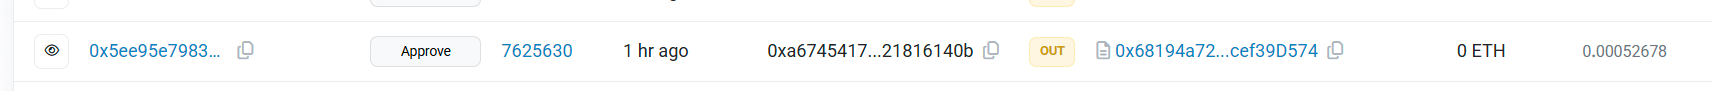

In [119]:
deposit_tokens()

Deposited 10000000000000000 tokens. Transaction hash: a5d64db396b3abc43af438b196e93f16f4547327197b8e85dd29e565093eac82
AttributeDict({'blockHash': HexBytes('0x6e2fbc67c6c77b94dcedada751710f28246fc0fce79d8ecff888ad5b8c82ed75'), 'blockNumber': 7625633, 'contractAddress': None, 'cumulativeGasUsed': 84620, 'effectiveGasPrice': 20000000000, 'from': '0xa674541764CC1DAc9C10A17EDc9CC2921816140b', 'gasUsed': 21620, 'logs': [], 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'), 'status': 1, 'to': '0xC329400492c6ff2

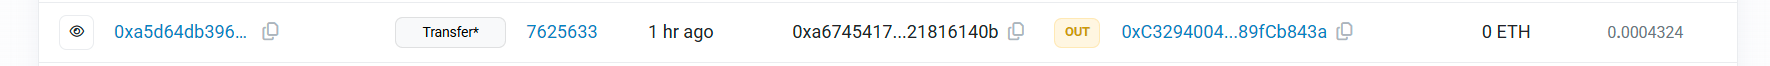

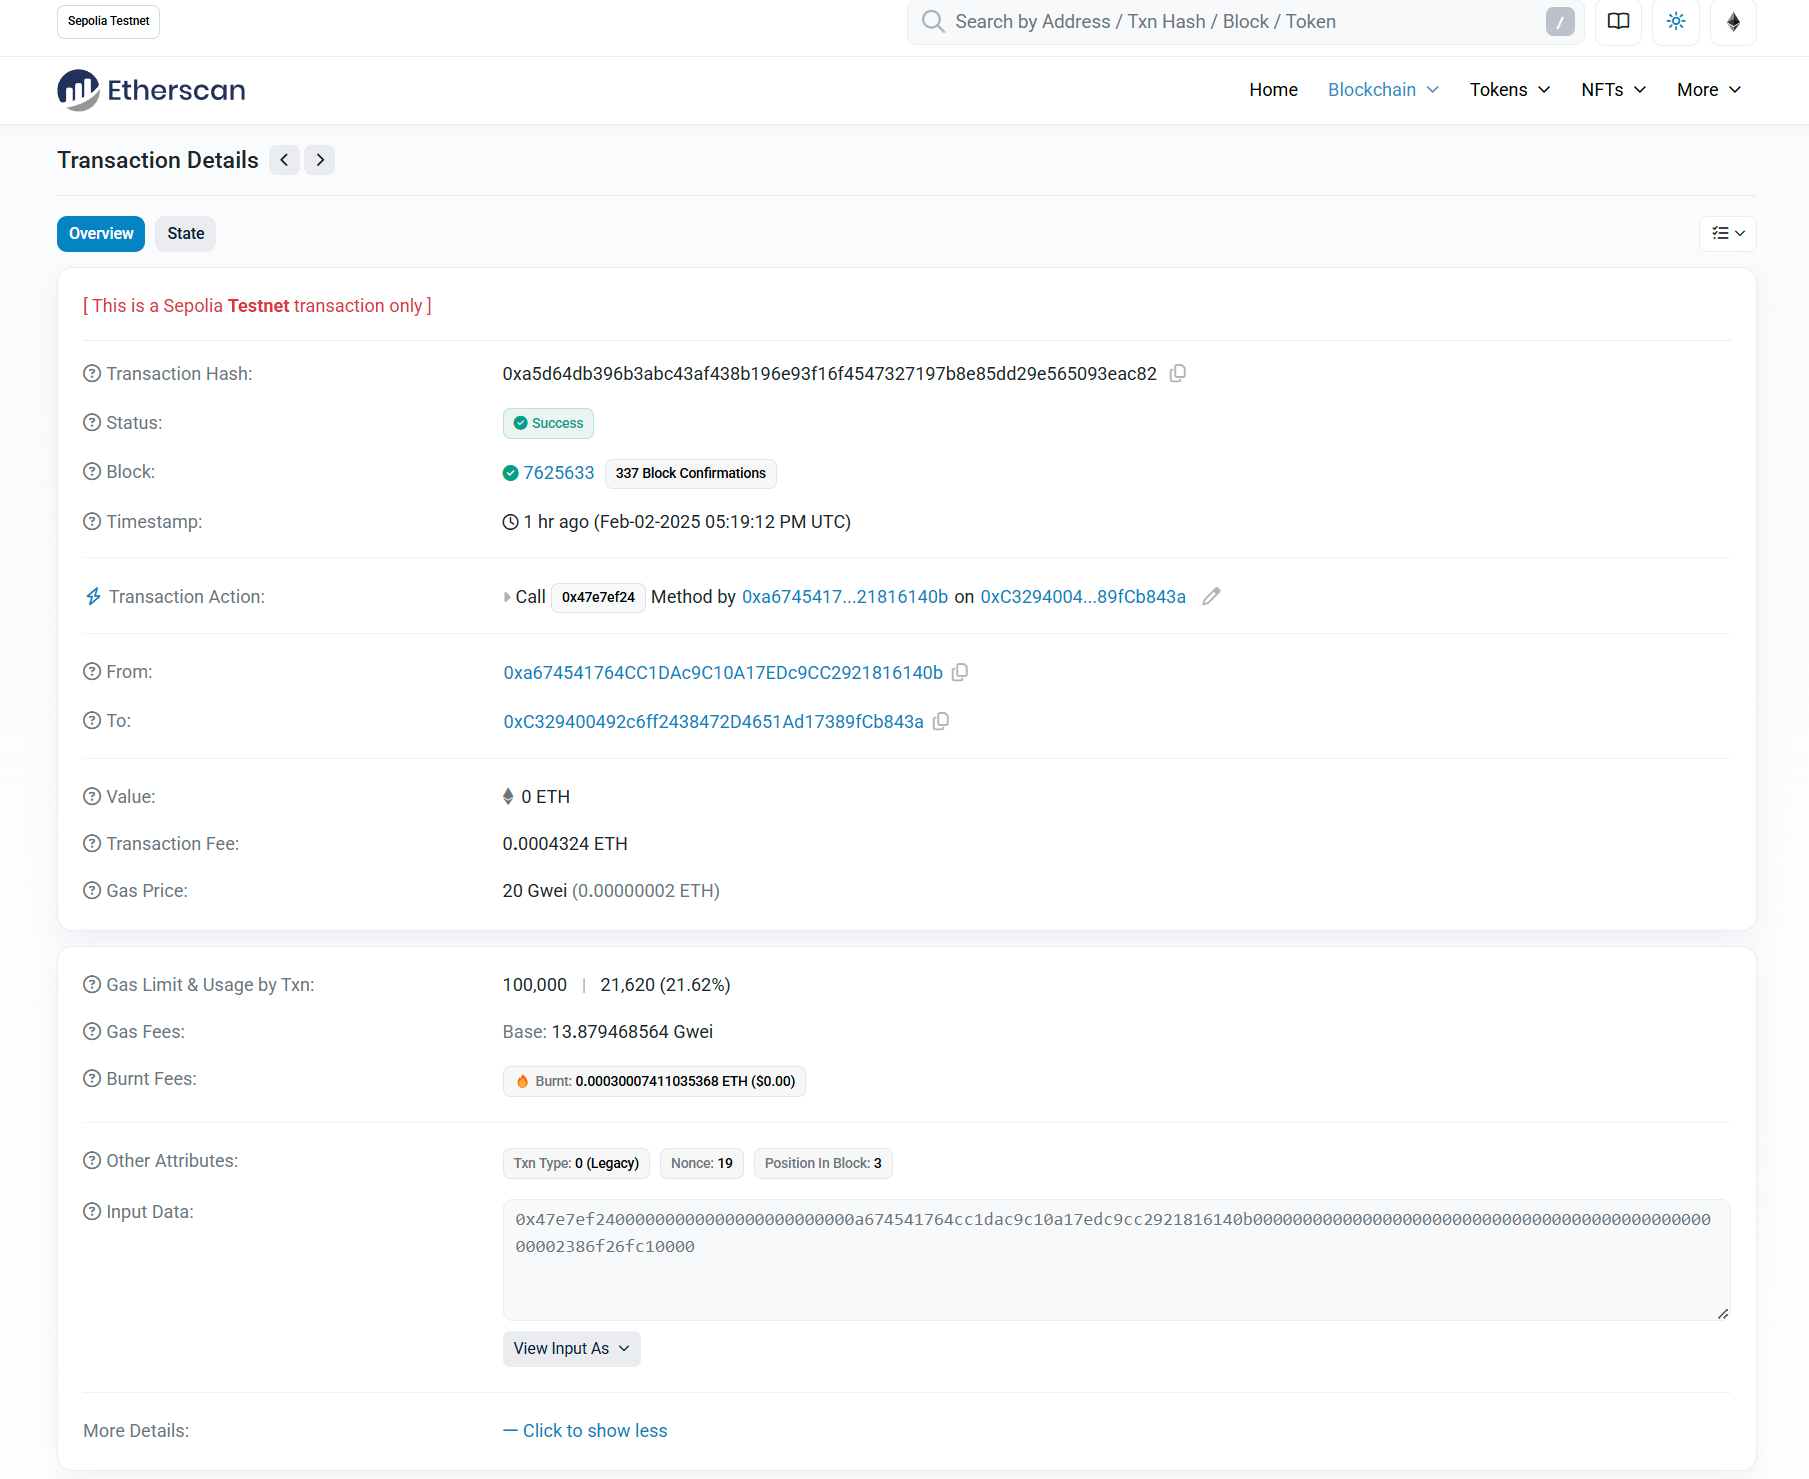

In [120]:

withdraw_tokens()


Withdrew 10000000000000000 tokens. Transaction hash: c0ad218594d41280a3a61764b38a5ed1bf0c5014580786a30cc07c948288f8b8
AttributeDict({'blockHash': HexBytes('0x2b88bb3099c8208aefa7814de47d0ec3ad7cfeb1e62f5d80d9241466c5e8682d'), 'blockNumber': 7625634, 'contractAddress': None, 'cumulativeGasUsed': 147620, 'effectiveGasPrice': 20000000000, 'from': '0xa674541764CC1DAc9C10A17EDc9CC2921816140b', 'gasUsed': 21620, 'logs': [], 'logsBloom': HexBytes('0x00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000'), 'status': 1, 'to': '0xC329400492c6ff2

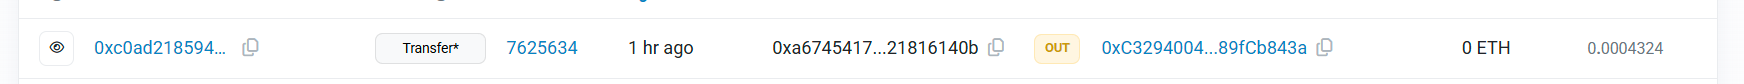

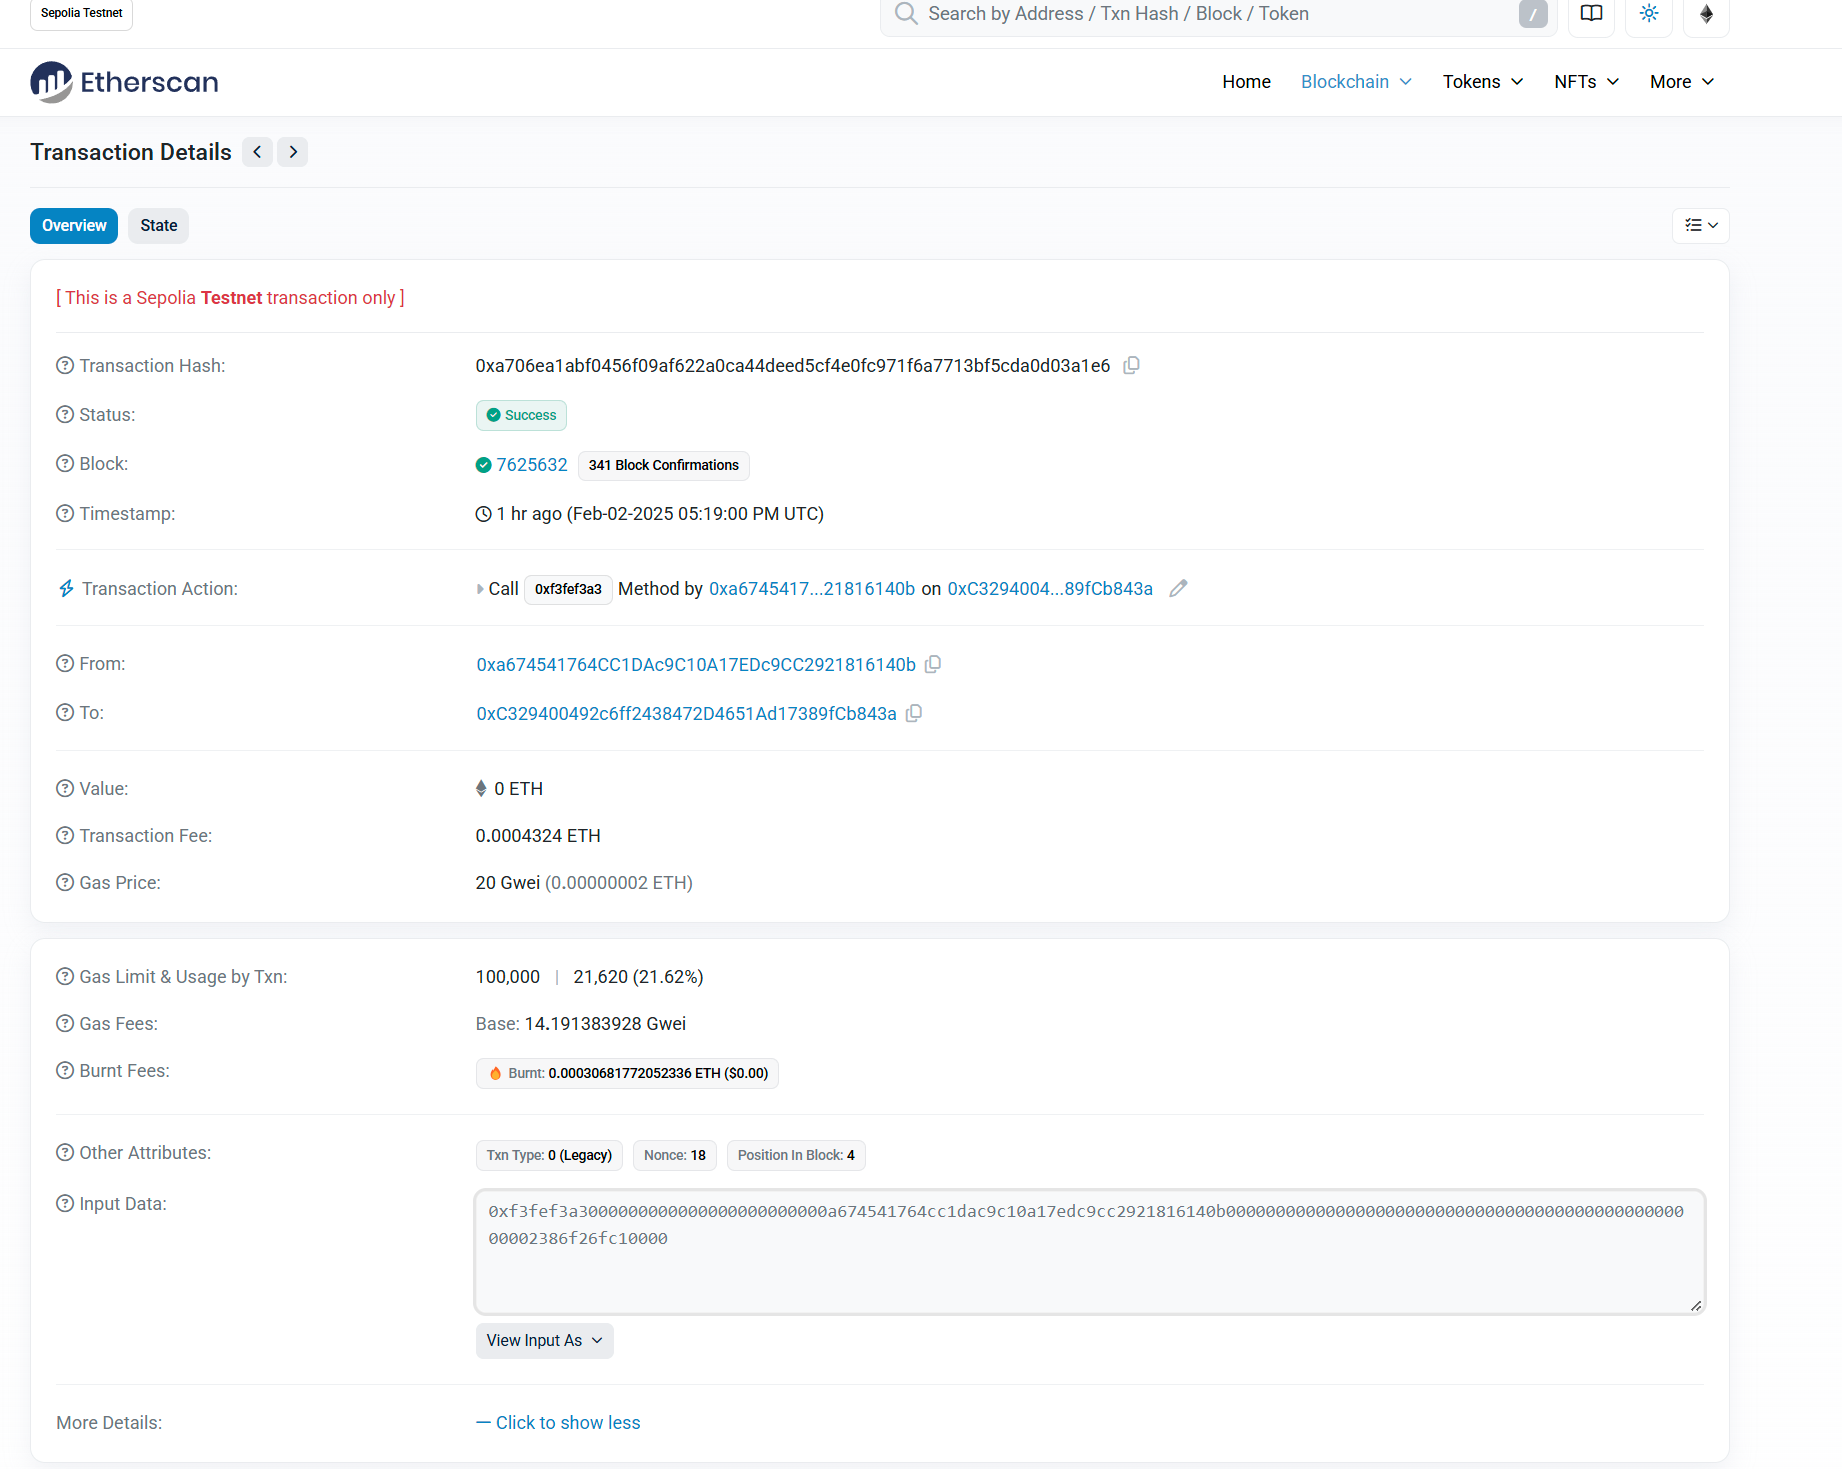